In [1]:
import glob
import pandas as pd
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import random

In [2]:
csvs = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/annotations/train/cell/*.csv'))
imgs = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/images/train/cell/*.jpg'))
#masks = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks/*.npy'))
assert(len(csvs)==len(imgs))

In [3]:
for i in tqdm(range(len(csvs))):   #creating masks for original cell patches
    try:
        annot = pd.read_csv(csvs[i],header=None)
        name = csvs[i].split('/')[-1][:-4]
        gt = np.zeros((3,1024,1024))
        for j in range(len(annot)):
            x,y,clas = annot.loc[j][0], annot.loc[j][1], annot.loc[j][2]
            Y, X = np.ogrid[:1024, :1024]
            dist_from_center = np.sqrt((X - x)**2 + (Y-y)**2)
            mask = dist_from_center <= 15
            if clas==1:
                gt[0][mask] = 1
            else:
                gt[1][mask] = 1
        #gt[2][np.where(gt[0]!=1) and np.where(gt[1]!=1)] = 1
        temp = np.bitwise_or(gt[0].astype(int),gt[1].astype(int))
        gt[2][np.where(temp==0)]  = 1
        
        np.save(f'/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks_v3/{name}.npy', gt)
    except: 
        name = csvs[i].split('/')[-1][:-4]
        gt = np.zeros((3,1024,1024))
        gt[2] = 1
        np.save(f'/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks_v3/{name}.npy', gt)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [04:33<00:00,  1.46it/s]


In [7]:
masks = sorted(glob.glob('/workspace/jay/DDP/Ocelot/ocelot2023/cell_seg_masks/*.npy'))
print(len(masks))

400


In [8]:
i=50
annot = pd.read_csv(csvs[i],header=None)
name = csvs[i].split('/')[-1][:-4]
image = np.array(Image.open(imgs[i]))
mask = np.load(masks[i])

In [9]:
j=17
y,x,clas = annot.loc[j][0], annot.loc[j][1], annot.loc[j][2]  

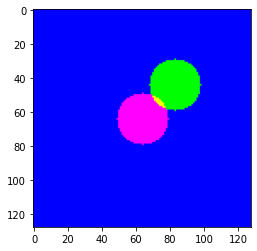

In [10]:
plt.imshow(np.moveaxis(mask,0,-1)[x-64:x+64,y-64:y+64,:])

In [8]:
mask[:,x-20:x+20,y-20:y+20]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

In [10]:
mask.shape

(3, 1024, 1024)

In [10]:
np.moveaxis(mask,0,-1)[x-64:x+64,y-64:y+64,:]

array([[[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.]],

       ...,

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]],

       [[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]])

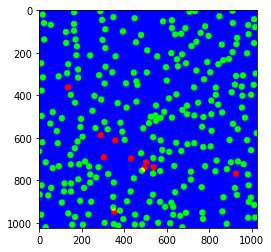

In [29]:
plt.imshow(np.moveaxis(gt,0,-1))

In [11]:
name

'006'

In [11]:
gt.shape

(3, 1024, 1024)

In [4]:
np.load(masks[0]).shape

(3, 1024, 1024)

In [13]:
mask = np.moveaxis(mask,0,-1)

In [10]:
np.sum(np.sum(np.load(masks[2]),axis=0))

1048593.0